In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder


In [97]:
# Step 1: Read data from CSV
anomaly_data = pd.read_csv("../data/COD/0_normalized.csv")
data= anomaly_data 



In [98]:
data

,document,element,frequency_in_document
0,1990,Acute hepatitis,0.000031
1,1990,Alcohol use disorders,0.000022
2,1990,Alzheimer's disease and other dementias,0.000105
3,1990,Cardiovascular diseases,0.002264
4,1990,Chronic kidney disease,0.000113
...,...,...,...
925,2019,Poisonings,0.000010
926,2019,Protein-energy malnutrition,0.000027
927,2019,Road injuries,0.000155
928,2019,Self-harm,0.000098


In [95]:
from sklearn.preprocessing import LabelEncoder
 
if 'document' in data.columns and 'frequency_in_document' in data.columns and 'element' in data.columns:
    data = data[['document', 'frequency_in_document', 'element']]
    # Encode 'element' column
    le = LabelEncoder()
    data['element_orig']= data['element']
    data['element'] = le.fit_transform(data['element'])
else:
    raise ValueError("CSV must contain 'year', 'freq', and 'element' columns")


# Step 4: Train Isolation Forest on multiple dimensions
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Adjust contamination to your needs
model.fit(data[['document', 'frequency_in_document', 'element']])  # Fit model on 'year', 'freq', and 'element' columns

# Step 5: Predict anomalies
predictions = model.predict(data[['document', 'frequency_in_document', 'element']])

# Step 6: Add results to DataFrame
data['anomaly'] = predictions
data

/var/folders/sx/3m4vwgws0bb929t0x6n3x5sh0000gn/T/ipykernel_5539/2045710614.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['element_orig']= data['element']
/var/folders/sx/3m4vwgws0bb929t0x6n3x5sh0000gn/T/ipykernel_5539/2045710614.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['element'] = le.fit_transform(data['element'])
/var/folders/sx/3m4vwgws0bb929t0x6n3x5sh0000gn/T/ipykernel_5539/2045710614.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,document,frequency_in_document,element,element_orig,anomaly
0,1990,0.000031,0,Acute hepatitis,1
1,1990,0.000022,1,Alcohol use disorders,1
2,1990,0.000105,2,Alzheimer's disease and other dementias,1
3,1990,0.002264,3,Cardiovascular diseases,-1
4,1990,0.000113,4,Chronic kidney disease,1
...,...,...,...,...,...
925,2019,0.000010,26,Poisonings,1
926,2019,0.000027,27,Protein-energy malnutrition,1
927,2019,0.000155,28,Road injuries,1
928,2019,0.000098,29,Self-harm,1


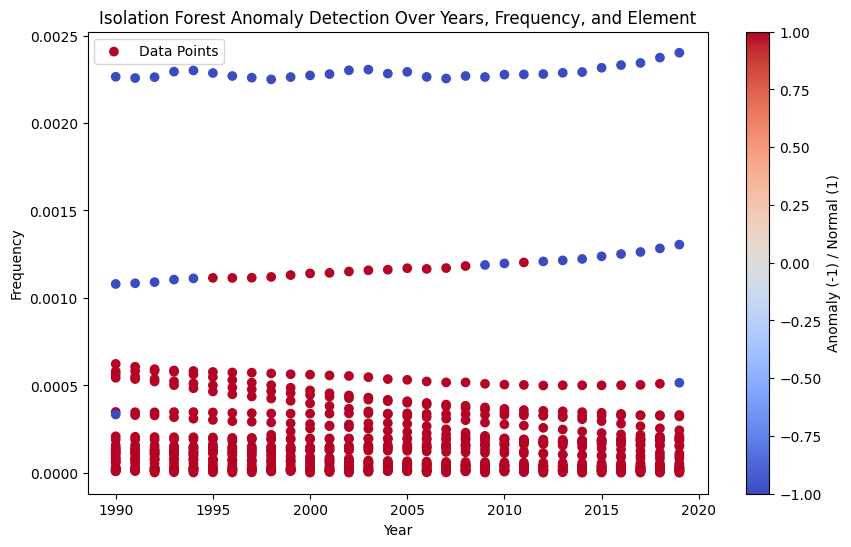

Number of anomalies detected: 47


In [96]:
 

# Step 7: Save results to CSV
data.to_csv('results_with_anomalies.csv', index=False)

# Step 8: Plot results with anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data['document'], data['frequency_in_document'], c=data['anomaly'], cmap='coolwarm', label='Data Points')
plt.colorbar(label='Anomaly (-1) / Normal (1)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Isolation Forest Anomaly Detection Over Years, Frequency, and Element')
plt.legend()
plt.show()

# Optional: Print anomaly count
print(f"Number of anomalies detected: {len(data[data['anomaly'] == -1])}")


In [90]:
df=data 
#anomaly_data= df[df['element'] == 'Self-harm']
df

,document,frequency_in_document,element,anomaly
0,1990,0.000031,0,1
1,1990,0.000022,1,1
2,1990,0.000105,2,1
3,1990,0.002264,3,-1
4,1990,0.000113,4,1
...,...,...,...,...
925,2019,0.000010,26,1
926,2019,0.000027,27,1
927,2019,0.000155,28,1
928,2019,0.000098,29,1


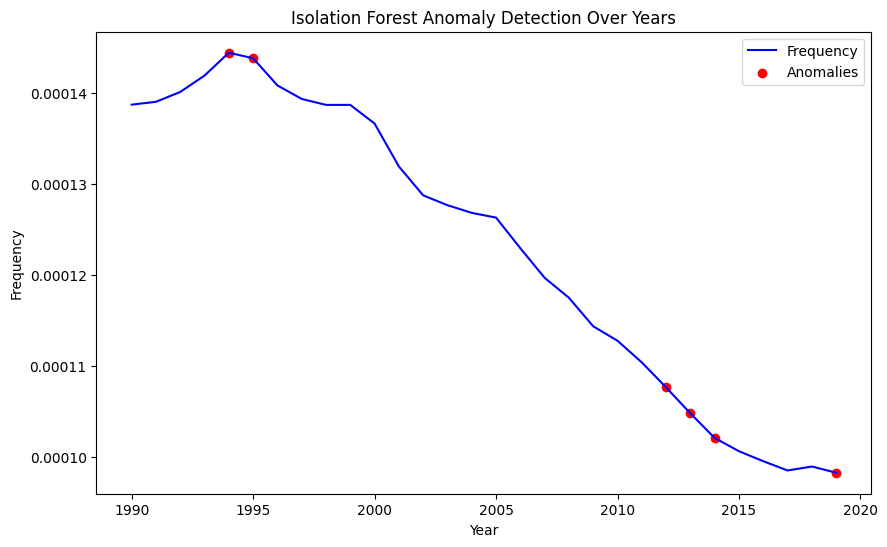

Number of anomalies detected: 6


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
data = anomaly_data[['document', 'frequency_in_document']] 

# Step 4: Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.20, random_state=42)  # Adjust contamination to your needs
model.fit(data[['frequency_in_document']])  # Fit model on 'freq' column

# Step 5: Predict anomalies
predictions = model.predict(data[['frequency_in_document']])

# Step 6: Add results to DataFrame
data['anomaly'] = predictions

# Step 7: Save results to CSV
data.to_csv('results_with_anomalies.csv', index=False)

# Step 8: Plot results with anomalies
plt.figure(figsize=(10, 6))
plt.plot(data['document'], data['frequency_in_document'], label='Frequency', color='blue')
plt.scatter(data['document'][data['anomaly'] == -1], data['frequency_in_document'][data['anomaly'] == -1], color='red', label='Anomalies')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Isolation Forest Anomaly Detection Over Years')
plt.legend()
plt.show()

# Optional: Print anomaly count
print(f"Number of anomalies detected: {len(data[data['anomaly'] == -1])}")


In [63]:
anomaly_data = anomaly_data.select_dtypes(include=[float,int]) 

In [54]:
'''
# Simulated Time Series with Anomalies
np.random.seed(42)
normal_data = np.sin(np.linspace(0, 50, 500))  # Sine wave as normal data
anomaly_data = normal_data.copy()
anomaly_data[450:460] += 3  # Inject anomalies
# Reshape and Scale Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(anomaly_data.reshape(-1, 1))
scaled_data  

'''

'\n# Simulated Time Series with Anomalies\nnp.random.seed(42)\nnormal_data = np.sin(np.linspace(0, 50, 500))  # Sine wave as normal data\nanomaly_data = normal_data.copy()\nanomaly_data[450:460] += 3  # Inject anomalies\n# Reshape and Scale Data\nscaler = MinMaxScaler()\nscaled_data = scaler.fit_transform(anomaly_data.reshape(-1, 1))\nscaled_data  \n\n'

In [64]:
anomaly_data

,document,frequency_in_document
3,1990,0.002264
34,1991,0.002257
65,1992,0.002262
96,1993,0.002294
127,1994,0.002300
158,1995,0.002286
189,1996,0.002268
220,1997,0.002259
251,1998,0.002249
282,1999,0.002263


In [65]:
data=anomaly_data 


Number of anomalies detected: 2


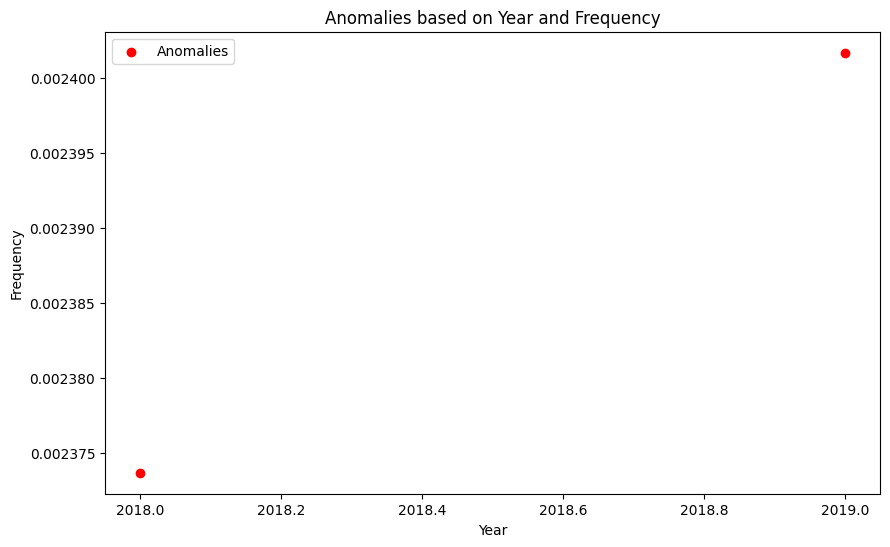

In [60]:
# Step 4: Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Adjust contamination to your needs
model.fit(data)

# Step 5: Predict anomalies
predictions = model.predict(data)

# Step 6: Add results to DataFrame
data['anomaly'] = predictions

# Step 7: Filter anomalies (if needed)
anomalies = data[data['anomaly'] == -1]

# Step 8: Save anomalies to CSV
anomalies.to_csv('anomalies_detected.csv', index=False)

# Optional: Print anomaly count
print(f"Number of anomalies detected: {len(anomalies)}")

# Step 9: Plot anomalies based on 'year' and 'freq'
if 'document' in anomalies.columns and 'frequency_in_document' in anomalies.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(anomalies['document'], anomalies['frequency_in_document'], color='red', label='Anomalies')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title('Anomalies based on Year and Frequency')
    plt.legend()
    plt.show()


In [57]:




# Train Isolation Forest Model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(scaled_data)

# Compute Anomaly Scores
scores = iso_forest.decision_function(scaled_data)
scores = -scores  # Invert scores so that higher values indicate more anomalous points

# Identify Anomalies: Points with Low Decision Function Values
threshold = np.percentile(scores, 80)  # Top 20% as anomalies
anomalies = np.where(scores > threshold)[0]
anomalies

array([ 1, 25, 26, 27, 28, 29])

KeyError: "None of [Index([1, 25, 26, 27, 28, 29], dtype='int64')] are in the [columns]"

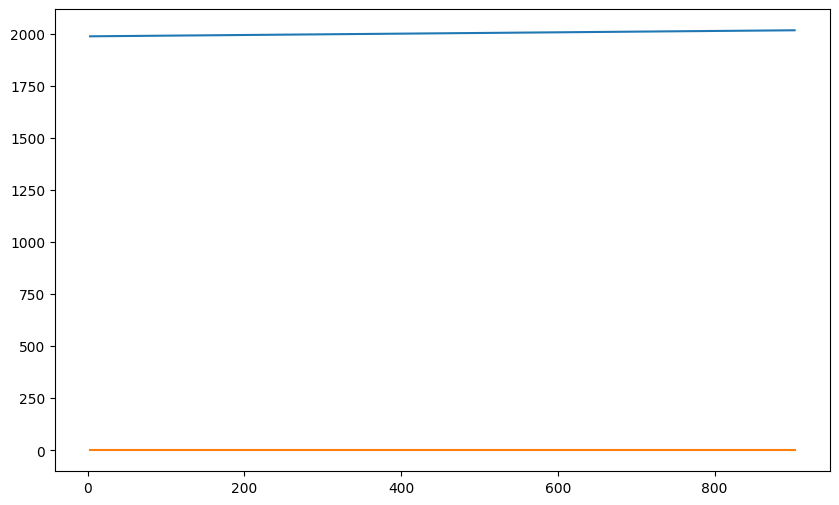

In [58]:


# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(anomaly_data, label="Time Series")
plt.scatter(anomalies, anomaly_data[anomalies], color='red', label="Anomalies", zorder=5)
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.savefig('anomaly_detection_isolation_forest.png')
plt.show()

print(f"Number of anomalies detected: {len(anomalies)}")
print(f"Anomaly indices: {anomalies}")